In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sympy as sp
import numpy as np

# Load directory ../Packages/PySW/ to path
import sys
sys.path.append('../Packages/PySW/')

from IPython.display import display, Math, Markdown

In [3]:
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize

# Transparent background for figures but keep the legend background white but its text color black
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'none'
plt.rcParams['legend.framealpha'] = 0.8
plt.rcParams['legend.shadow'] = False
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'none'
# White spins, axis and ticks 
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'

In [4]:
R, L, Dz = sp.symbols('R L Delta_z', positive=True, real=True)

b1 = 8 * sp.pi * R**2 * ( 1/((L + 2*Dz)**2 + 4*R**2)**(sp.Rational(3,2)) - 1/((L - 2*Dz)**2 + 4*R**2)**(sp.Rational(3,2)) )
b2 = 24 * sp.pi * R**2 * ( (L - 2*Dz) / ((L - 2*Dz)**2 + 4*R**2)**(sp.Rational(5,2)) + (L + 2*Dz) / ((L + 2*Dz)**2 + 4*R**2)**(sp.Rational(5,2)) )

In [5]:
Dp, Dm = sp.symbols('Delta_+ Delta_-', real=True)
dp, dm = sp.symbols('delta_+ delta_-', real=True, positive=True)

b1 = (dm**sp.Rational(3,2) - dp**sp.Rational(3,2)) / (dm*dp)**sp.Rational(3,2)
b2 = (Dm *dp**sp.Rational(5,2) + Dp * dm**sp.Rational(5,2)) / (dm*dp)**sp.Rational(5,2)
(b1/b2).cancel()

(-delta_+**(5/2)*delta_- + delta_+*delta_-**(5/2))/(Delta_+*delta_-**(5/2) + Delta_-*delta_+**(5/2))

In [6]:
sp.factor_terms(((dm**sp.Rational(5,2) * (Dp**2 + 4*R**2) - dp**sp.Rational(5,2) * (Dm**2 + 4*R**2)) / (Dp * dm**sp.Rational(5,2) + Dm * dp**sp.Rational(5,2))).subs({Dm : L - 2*Dz, Dp : L + 2*Dz}).cancel().collect([Dz, L, Dz*L]))

(4*Delta_z**2*(delta_+**(5/2) - delta_-**(5/2)) - 4*Delta_z*L*(delta_+**(5/2) + delta_-**(5/2)) + L**2*(delta_+**(5/2) - delta_-**(5/2)) + 4*R**2*delta_+**(5/2) - 4*R**2*delta_-**(5/2))/(2*Delta_z*(delta_+**(5/2) - delta_-**(5/2)) - L*(delta_+**(5/2) + delta_-**(5/2)))

In [1]:
from Simulation_utils import Hamiltonian2D_Elliptical_Quantum_Well, CylindricalMagnet
import json
import matplotlib.pyplot as plt
simulation_params = json.load(open('simulation_params.json', 'r'))
print(simulation_params)

{'Bz': 0.1, 'M': 1000000.0, 'L': 50, 'Delta z': 100, 'lx': 60, 'ly': 60}


In [25]:
skyrmion = CylindricalMagnet(simulation_params['M'], 50, simulation_params['L'], 140)

914256006.9957116 979261045.1748989


In [26]:
skyrmion.b_1()/skyrmion.b_2()

79.22013752789367

In [4]:
qubit_test = Hamiltonian2D_Elliptical_Quantum_Well(simulation_params['lx'], simulation_params['ly'], simulation_params['Bz'], skyrmion, minimal_coupling=True)
1/(qubit_test.omega_c / qubit_test.omega_x)

-1.1385556231795941

In [12]:
skyrmion.b_1()/skyrmion.b_2()

65.1563683752312

In [9]:
qubit_test.delta_plus_2

3338963461.7867646

In [10]:
qubit_test.f1

1894672836.011621

In [11]:
import fractions

fractions.Fraction(qubit_test.omega_2 / qubit_test.omega_x).limit_denominator()

Fraction(382085, 585099)

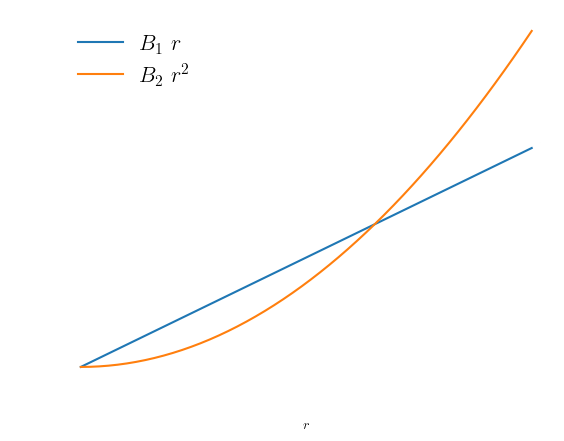

In [12]:
rs = np.linspace(0, 100)
B1s = np.array([skyrmion.b_1() * r for r in rs])
B2s = np.array([skyrmion.b_2() * r**2 for r in rs])

fig, ax = plt.subplots()

ax.plot(rs, B1s, label=r'$B_1~r$')
ax.plot(rs, B2s, label=r'$B_2~r^2$')

ax.set_xlabel(r'$r$')
ax.legend()

In [13]:
k_y = sp.symbols('k_y', real=True, positive=True)
k_B = sp.symbols('k_B', real=True, positive=True)
omega_x, omega_y = sp.symbols('omega_x omega_y', real=True, positive=True)
omega_y = omega_x / k_y
omega_c = omega_x / k_B

Omega_3_2 = sp.sqrt((omega_x**2 - omega_y**2)**2 + 2*omega_c**2 * (omega_x**2 + omega_y**2) + omega_c**4).expand()
Omega_3_2

sqrt(omega_x**4 - 2*omega_x**4/k_y**2 + omega_x**4/k_y**4 + 2*omega_x**4/k_B**2 + 2*omega_x**4/(k_B**2*k_y**2) + omega_x**4/k_B**4)

In [14]:
k_3 = sp.symbols('k_3', real=True, positive=True)
kp = sp.sqrt(2*((1+1/k_y**2 + 1/k_B**2 + 1/k_3**2))**-1)
display((1/kp**2))
km = sp.sqrt(2*((1+1/k_y**2 + 1/k_B**2 - 1/k_3**2))**-1)
display(km)

1/2 + 1/(2*k_y**2) + 1/(2*k_B**2) + 1/(2*k_3**2)

sqrt(2)*sqrt(1/(1 + k_y**(-2) + k_B**(-2) - 1/k_3**2))

In [15]:
Omega_x = sp.sqrt(omega_x **2 + sp.Rational(1,4) * omega_c**2)
Omega_y = sp.sqrt(omega_y **2 + sp.Rational(1,4) * omega_c**2)
Omega_3 = omega_x / k_3

subs_dict = {
    k_3**4 : ((1-1/k_y**2)**2 + 2/k_B**2*(1+1/k_y**2) + 1/k_B**4),
}

subs_dict_2 = {
    sp.sqrt(((1-1/k_y**2)**2 + 2/k_B**2*(1+1/k_y**2) + 1/k_B**4)).cancel()*k_B**3*k_y**3 : k_3**2*k_B**3*k_y**3,
}

display(list(subs_dict_2.keys())[0])


k_p = sp.symbols('k_+', real=True, positive=True)
k_m = sp.symbols('k_-', real=True, positive=True)

c1 = sp.sqrt((Omega_x**2 + 3*Omega_y**2 + Omega_3**2) / (2 * (Omega_x**2 + Omega_y**2)))
Omega_1 = sp.sqrt(sp.Rational(1,4) * (3*Omega_x**2 + Omega_y**2 + Omega_3**2))
display((Omega_1**2).cancel().expand() - (omega_x**2 / 2 * (1 + 1/kp**2)).expand())

display((c1**2).cancel())

c2 = sp.sqrt((3*Omega_x**2 + Omega_y**2 - Omega_3**2) / (2 * (Omega_x**2 + Omega_y**2)))
Omega_2 = sp.sqrt(sp.Rational(1,4) * (Omega_x**2 + 3*Omega_y**2 - Omega_3**2))
sp.factor_terms(Omega_2**2)

sqrt(k_B**6*k_y**6 - 2*k_B**6*k_y**4 + k_B**6*k_y**2 + 2*k_B**4*k_y**6 + 2*k_B**4*k_y**4 + k_B**2*k_y**6)

0

(k_3**2*k_B**2*k_y**2 + 3*k_3**2*k_B**2 + k_3**2*k_y**2 + k_B**2*k_y**2)/(2*k_3**2*k_B**2*k_y**2 + 2*k_3**2*k_B**2 + k_3**2*k_y**2)

omega_x**2*(1 + 3/k_y**2 + k_B**(-2) - 1/k_3**2)/4

In [49]:
Kp, Km = sp.symbols('K_+ K_-', real=True, positive=True)
Omega_x_2_plus_Omega_y_2 = 2*omega_x**2 / (Kp*Km*k_y)

theta = sp.atan((-omega_c * sp.sqrt(2*Omega_x_2_plus_Omega_y_2) / (omega_x**2 - omega_y**2)).factor()) / 2
theta = sp.atan(-sp.symbols('A')/sp.symbols('B'))/2
display(theta)
sp.trigsimp(sp.cos(theta)**2)

-atan(A/B)/2

1/2 + 1/(2*sqrt(A**2/B**2 + 1))

In [17]:
(omega_x**2 - omega_y**2).factor()

omega_x**2*(k_y - 1)*(k_y + 1)/k_y**2

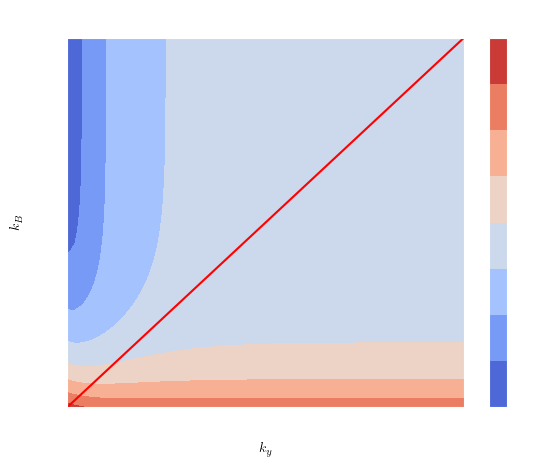

In [18]:
import matplotlib
fig, ax = plt.subplots()
KYs = np.linspace(1, 100, 1000)
KBs = np.linspace(1, 100, 1000)
KYS, KBS = np.meshgrid(KYs, KBs)

Omega_3_2_f =  sp.lambdify([k_y, k_B], sp.factor_terms(Omega_3_2).factor() / omega_x**2)

# set the (0, 0) element in the bottom left corner
im = ax.contourf(KYS, KBS,Omega_3_2_f(KYS, KBS), cmap='coolwarm')
# 
ax.set_title(r'$\Omega_3^2 / \omega_x^2$', color='white')
ax.set_xlabel(r'$k_y$')
ax.set_ylabel(r'$k_B$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(KYs, KYs, color='red')


#color bar log scale
cbar = fig.colorbar(im)


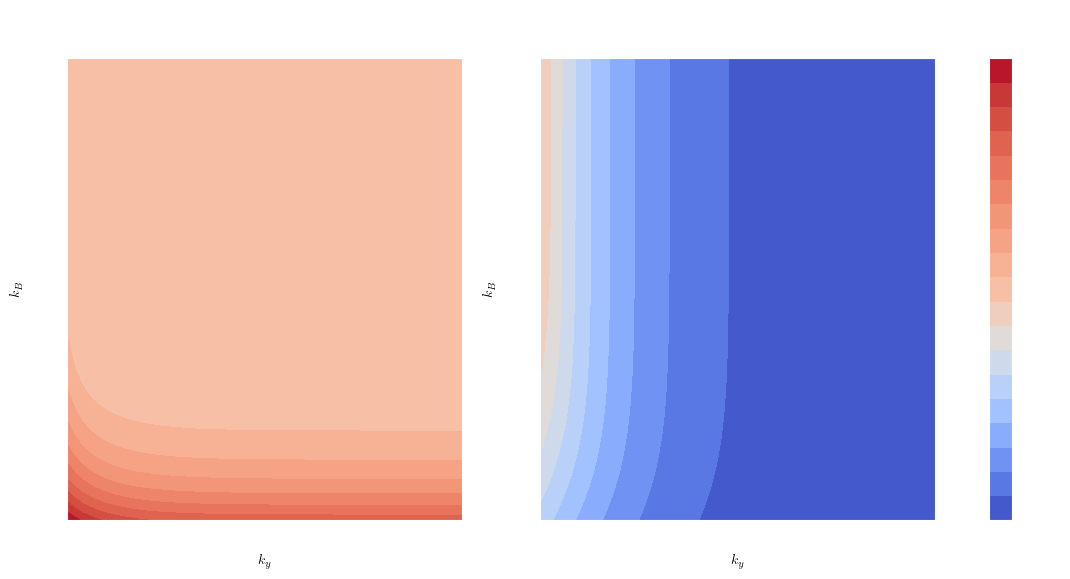

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
KYs = np.linspace(1, 100, 1000)
KBs = np.linspace(1, 100, 1000)
KYS, KBS = np.meshgrid(KYs, KBs)

Omega_3_2_f =  sp.lambdify([k_y, k_B], sp.factor_terms(Omega_3_2).factor() / omega_x**2)
k_p_val = lambda ky, kB: 1/(np.sqrt(1/2) * np.sqrt(1 + 1/ky**2 + 1/kB**2 + Omega_3_2_f(ky, kB)))
k_m_val= lambda ky, kB: 1/(np.sqrt(1/2) * np.sqrt(1 + 1/ky**2 + 1/kB**2 - Omega_3_2_f(ky, kB)))

k_p_r = k_p_val(KYS, KBS)
k_m_r = k_m_val(KYS, KBS)

# set the (0, 0) element in the bottom left corner
omega_1r = 1/k_p_r
omega_2r = 1/k_m_r


vmax = (1 + np.sqrt(5))/2
vmin = 0

N_levels = 20
d_levels = (vmax - vmin) / N_levels
levels = np.concatenate([np.linspace(vmin, 1, N_levels//2), np.linspace(1+d_levels, vmax, N_levels//2)])

im = ax[0].contourf(KYS, KBS, omega_1r, cmap='coolwarm', vmin=vmin, vmax=vmax, levels=levels)

ax[0].set_title(r'$\omega_1 / \omega_x \equiv \frac1{k_+}$', color='white', pad=20)
ax[0].set_xlabel(r'$k_y$')
ax[0].set_ylabel(r'$k_B$')

ax[0].set_xscale('log')
ax[0].set_yscale('log')

im2 = ax[1].contourf(KYS, KBS, omega_2r, cmap='coolwarm', vmin=vmin, vmax=vmax, levels=levels)

ax[1].set_title(r'$\omega_2 / \omega_x \equiv \frac1{k_-}$', color='white', pad=20)
ax[1].set_xlabel(r'$k_y$')
ax[1].set_ylabel(r'$k_B$')

ax[1].set_xscale('log')
ax[1].set_yscale('log')


#color bar log scale
cbar = fig.colorbar(im, ax=ax)

# ticks of the color bar

cbar.set_ticks(levels)
levels_ticks = [f'{l:.2f}' for l in levels]
levels_ticks[-1] = r'$\varphi$'
cbar.set_ticklabels(levels_ticks)



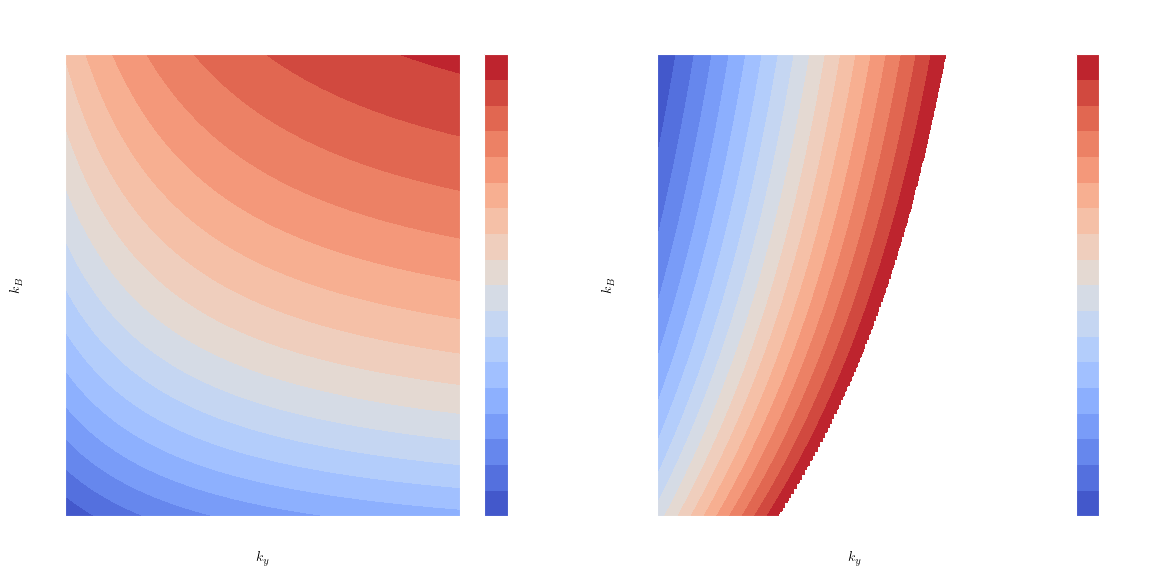

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

KYs = np.linspace(1, 2, 1000)
KBs = np.linspace(1, 2, 100)
KYS, KBS = np.meshgrid(KYs, KBs)

Omega_3_2_f =  sp.lambdify([k_y, k_B], sp.factor_terms(Omega_3_2).factor() / omega_x**2)
k_p_val = lambda ky, kB: 1/(np.sqrt(1/2) * np.sqrt(1 + 1/ky**2 + 1/kB**2 + Omega_3_2_f(ky, kB)))
k_m_val= lambda ky, kB: 1/(np.sqrt(1/2) * np.sqrt(1 + 1/ky**2 + 1/kB**2 - Omega_3_2_f(ky, kB)))

k_p_r = k_p_val(KYS, KBS)
k_m_r = k_m_val(KYS, KBS)


N_levels = 20
im =ax[0].contourf(KYS, KBS, k_p_r, cmap='coolwarm', levels=N_levels)

ax[0].set_title(r'$k_+$', color='white', pad=20)
ax[0].set_xlabel(r'$k_y$')
ax[0].set_ylabel(r'$k_B$')


k_m_r_ = k_m_r.copy()
k_m_r_[k_m_r_ > 2] = np.nan

im2 = ax[1].contourf(KYS, KBS, k_m_r_, cmap='coolwarm', levels=N_levels)

ax[1].set_title(r'$k_-$', color='white', pad=20)
ax[1].set_xlabel(r'$k_y$')
ax[1].set_ylabel(r'$k_B$')

#color bar log scale
cbar1 = fig.colorbar(im, ax=ax[0])
cbar2 = fig.colorbar(im2, ax=ax[1])



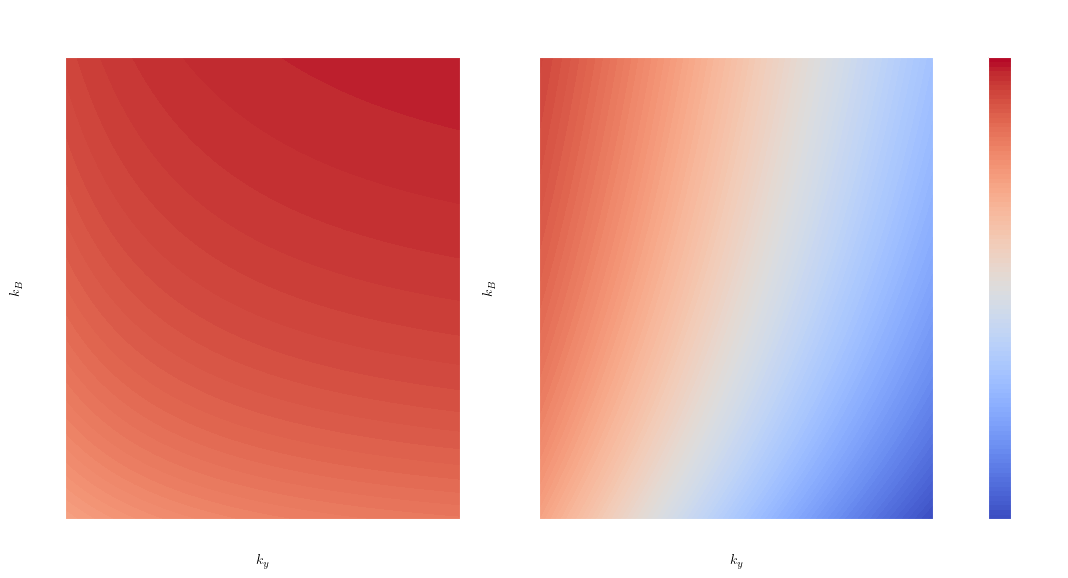

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
KYs = np.linspace(1, 2, 1000)
KBs = np.linspace(1, 2, 1000)
KYS, KBS = np.meshgrid(KYs, KBs)

Omega_3_2_f =  sp.lambdify([k_y, k_B], sp.factor_terms(Omega_3_2).factor() / omega_x**2)
k_p_val = lambda ky, kB: 1/(np.sqrt(1/2) * np.sqrt(1 + 1/ky**2 + 1/kB**2 + Omega_3_2_f(ky, kB)))
k_m_val= lambda ky, kB: 1/(np.sqrt(1/2) * np.sqrt(1 + 1/ky**2 + 1/kB**2 - Omega_3_2_f(ky, kB)))

k_p_r = k_p_val(KYS, KBS)
k_m_r = k_m_val(KYS, KBS)


KP_val = 2*k_p_r / (1 + k_p_r**2)
KM_val = 2*k_m_r / (1 + k_m_r**2)

vmax = 1#np.max([KP_val.max(), KM_val.max()])
vmin = np.min([KP_val.min(), KM_val.min()])

N_levels = 100
d_levels = (vmax - vmin) / N_levels
levels = np.linspace(vmin, vmax, N_levels)

im = ax[0].contourf(KYS, KBS, KP_val, cmap='coolwarm', vmin=vmin, vmax=vmax, levels=levels)

ax[0].set_title(r'$K_+ = 2k_+ / (1 + k_+^2)$', color='white', pad=20)
ax[0].set_xlabel(r'$k_y$')
ax[0].set_ylabel(r'$k_B$')

#ax[0].set_xscale('log')
#ax[0].set_yscale('log')

im2 = ax[1].contourf(KYS, KBS, KM_val, cmap='coolwarm', vmin=vmin, vmax=vmax, levels=levels)

ax[1].set_title(r'$K_- = 2k_- / (1 + k_-^2)$', color='white', pad=20)
ax[1].set_xlabel(r'$k_y$')
ax[1].set_ylabel(r'$k_B$')

#ax[1].set_xscale('log')
#ax[1].set_yscale('log')


#color bar log scale
cbar = fig.colorbar(im, ax=ax)

# ticks of the color bar

cbar.set_ticks(levels[np.arange(0, N_levels, 10)])
levels_ticks = [f'{l:.2f}' for l in levels[np.arange(0, N_levels, 10)]]
cbar.set_ticklabels(levels_ticks)

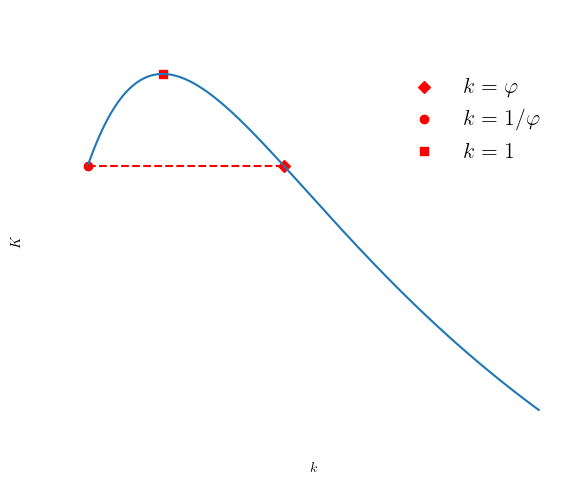

In [22]:
varphi = (1 + np.sqrt(5))/2

x_min = np.min([k_m_r.min(), k_p_r.min()])
x_max = np.max([k_m_r.max(), k_p_r.max()])

x = np.linspace(x_min, x_max, 10000)
f = lambda x: 2*x / (1 + x**2)
y = f(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.hlines(f(varphi), 1/varphi, varphi, color='red', ls='--')
ax.scatter(varphi, f(varphi), color='red', label=r'$k=\varphi$', marker='D')
ax.scatter(1/varphi, f(1/varphi), color='red', label=r'$k=1/\varphi$', marker='o')
ax.scatter(1, f(1), color='red', label=r'$k=1$', marker='s')

ax.set_xlabel(r'$k$')
ax.set_title(r'$K = 2k / (1 + k^2)$', color='white', pad=20)
ax.set_ylabel(r'$K$')
ax.legend()

#ax.set_xscale('log')

Text(0, 0.5, '$K$')

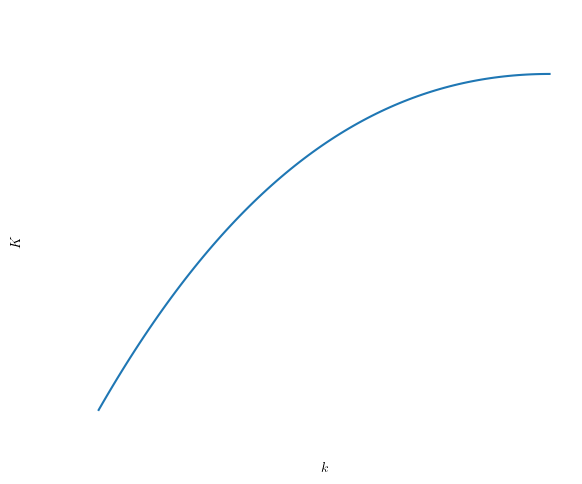

In [23]:
x = np.linspace(x_min, 1, 100)
y = f(x)

fig, ax = plt.subplots()
ax.plot(x, y)


ax.set_xlabel(r'$k$')
ax.set_title(r'$K = 2k / (1 + k^2)$', color='white', pad=20)
ax.set_ylabel(r'$K$')


/tmp/ipykernel_860/179335378.py:1: RuntimeWarning: divide by zero encountered in divide
  theta_f = lambda ky, kB: np.arctan(-(2*ky**2)/(kB*np.sqrt(f(k_p_val(ky, kB))*f(k_m_val(ky, kB))*ky)*(ky**2-1)))/2


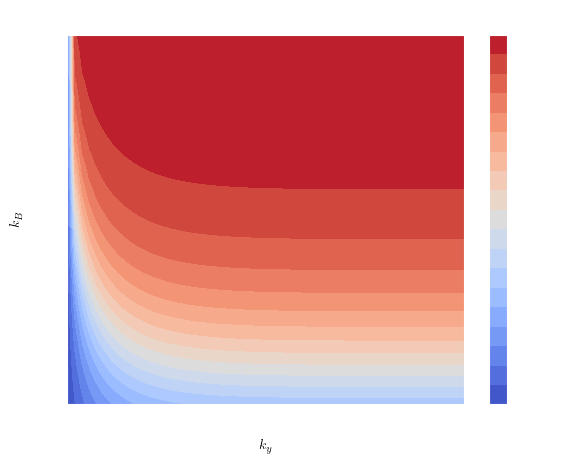

In [24]:
theta_f = lambda ky, kB: np.arctan(-(2*ky**2)/(kB*np.sqrt(f(k_p_val(ky, kB))*f(k_m_val(ky, kB))*ky)*(ky**2-1)))/2

KYs = np.linspace(1, 100, 1000)
KBs = np.linspace(1, 100, 1000)
KYS, KBS = np.meshgrid(KYs, KBs)


theta = theta_f(KYS, KBS)

vmin = np.min(theta)
vmax = np.max(theta)

N_levels = 20
d_levels = (vmax - vmin) / N_levels
levels = np.linspace(vmin, vmax, N_levels)

fig, ax = plt.subplots()
im = ax.contourf(KYS, KBS, theta, cmap='coolwarm', levels=levels, vmin=vmin, vmax=vmax)
ax.set_title(r'$\theta$', color='white')
ax.set_xlabel(r'$k_y$')
ax.set_ylabel(r'$k_B$')

ax.set_xscale('log')
ax.set_yscale('log')

cbar = fig.colorbar(im, ax=ax)
import fractions
cbar.set_ticks(levels[np.arange(0, N_levels, 2)])
#levels_ticks = [f'$\\frac{{{fractions.Fraction(l/np.pi).limit_denominator(100).numerator if fractions.Fraction(l/np.pi).limit_denominator(100).numerator > 1 else ''}\\pi}}{{{fractions.Fraction(l/np.pi).limit_denominator(100).denominator}}}$' for l in levels[np.arange(0, N_levels, 2)]]
levels_ticks = [f'{l/np.pi:.2f}' for l in levels[np.arange(0, N_levels, 2)]]
cbar.set_ticklabels(levels_ticks)


In [25]:
theta_f(5, 10000)

-7.511565118762676e-05

In [26]:
1/4

0.25

In [27]:
ks = sp.symbols('k', real=True, positive=True)

Kf = 2*ks / (1 + ks**2)
sp.solve(sp.diff(Kf, ks), ks)

[1]

Text(0.5, 0.5, '$k_B$')

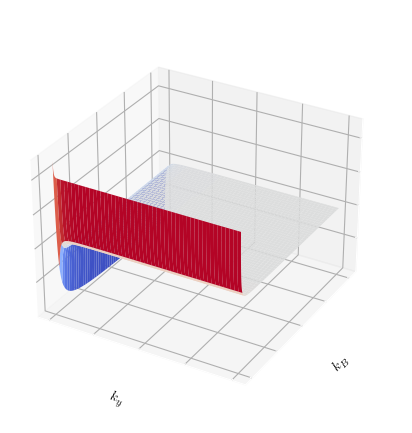

In [28]:
# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(KYS, KBS, Omega_3_2_f(KYS, KBS), cmap='coolwarm')

ax.set_title(r'$\Omega_3^2 / \omega_x^2$', color='white')
ax.set_xlabel(r'$k_y$')
ax.set_ylabel(r'$k_B$')



In [29]:
Omega_x = sp.sqrt(omega_x**2 + sp.Rational(1, 4) * omega_c**2)
Omega_y = sp.sqrt(omega_y**2 + sp.Rational(1, 4) * omega_c**2)


c1 = sp.sqrt((Omega_x**2 + 3 * Omega_y**2 + Omega_3_2) / (2 * (Omega_x**2 + Omega_y**2)) )
c2 = sp.sqrt((3 * Omega_x**2 + Omega_y**2 - Omega_3_2) / (2 * (Omega_x**2 + Omega_y**2)) )
Omega_1 = sp.sqrt(sp.Rational(1, 4) * (3 * Omega_x**2 + Omega_y**2 +  Omega_3_2))
Omega_2 = sp.sqrt(sp.Rational(1, 4) * (Omega_x**2 + 3 * Omega_y**2 -  Omega_3_2))

c1

sqrt(omega_x**2 + sqrt(omega_x**4 - 2*omega_x**4/k_y**2 + omega_x**4/k_y**4 + 2*omega_x**4/k_B**2 + 2*omega_x**4/(k_B**2*k_y**2) + omega_x**4/k_B**4) + 3*omega_x**2/k_y**2 + omega_x**2/k_B**2)/sqrt(2*omega_x**2 + 2*omega_x**2/k_y**2 + omega_x**2/k_B**2)

In [30]:
omega_1 = sp.sqrt(1/2 * (omega_x**2 + omega_y**2 + omega_c**2 + Omega_3_2))
omega_2 = sp.sqrt(1/2 * (omega_x**2 + omega_y**2 + omega_c**2 - Omega_3_2))
omega_1_val = sp.lambdify([k_B, k_y, omega_x], omega_1, modules='numpy')
omega_2_val = sp.lambdify([k_B, k_y, omega_x], omega_2, modules='numpy')

In [31]:
from Simulation_utils import h_bar, e, m

lx = 60e-9
omega_x_val = h_bar / (m * lx)

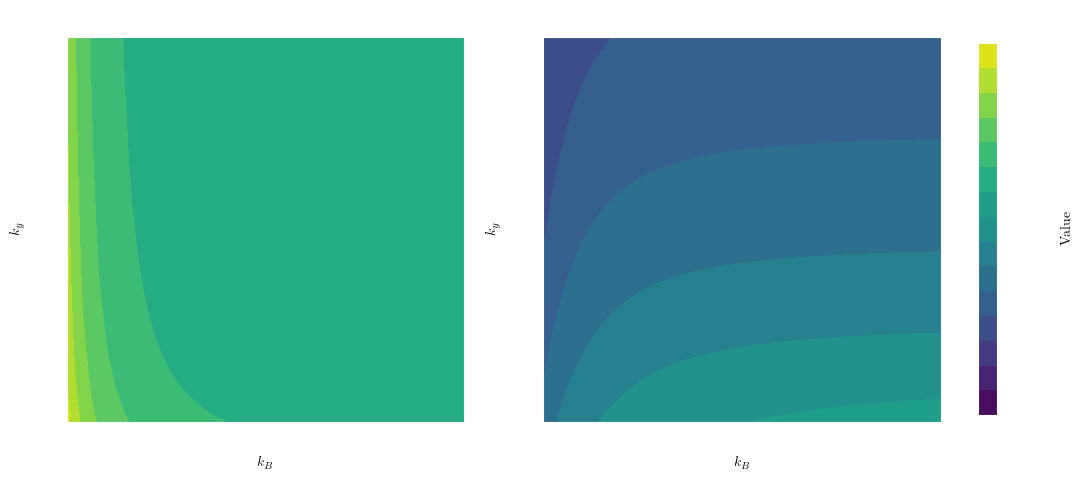

In [32]:
KB = np.linspace(1, 10)
KY = np.linspace(1, 2)

KB, KY = np.meshgrid(KB, KY)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Compute the values for omega_1 and omega_2
omega_1 = omega_1_val(KB, KY, 1)
omega_2 = omega_2_val(KB, KY, 1)

# Get the minimum and maximum values for the color limits
vmin = 0
vmax = max(omega_1.max(), omega_2.max()) + 0.1

N_levels = 15
d_levels = (vmax - vmin) / N_levels
levels = np.concatenate([np.arange(vmin, 1, d_levels), np.arange(1, vmax, d_levels)])
# Plot the first contour
contour1 = ax[0].contourf(KB, KY, omega_1, levels=levels, vmin=vmin, vmax=vmax)
ax[0].set_title(r'$\omega_1 / \omega_x$', color='white')
ax[0].set_xlabel('$k_B$')
ax[0].set_ylabel('$k_y$')

# Plot the second contour
contour2 = ax[1].contourf(KB, KY, omega_2, levels=levels, vmin=vmin, vmax=vmax)
ax[1].set_title(r'$\omega_2 / \omega_x$', color='white')
ax[1].set_xlabel('$k_B$')
ax[1].set_ylabel('$k_y$')

# Add a single colorbar
cbar = fig.colorbar(contour1, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Value')



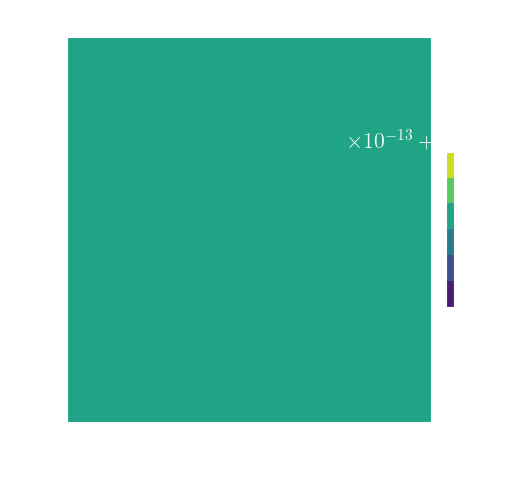

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))

# Compute the values for omega_1 and omega_2
omega_1 = omega_1_val(KB, KY, 1)
omega_2 = omega_2_val(KB, KY, 1)

contour = ax.contourf(KB, KY, KY*(omega_1*omega_2))

ax.set_title(r'$k_y / (k_+ k_-)$', color='white')
ax.set_xlabel('$k_B$', color='white')
ax.set_ylabel('$k_y$', color='white')

cbar = fig.colorbar(contour, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)

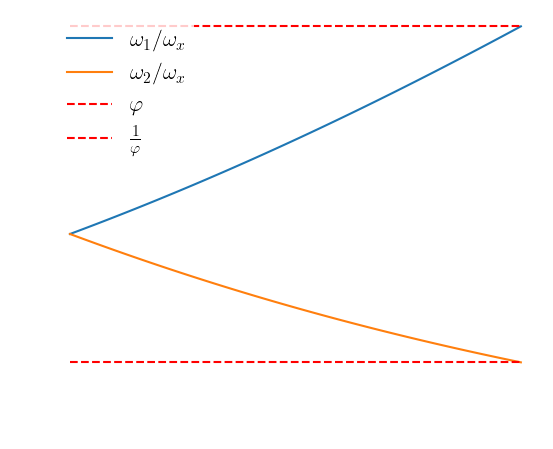

In [34]:
ky = 1
omega_c_val = np.linspace(0, 1, 100)

omega_c_ = sp.symbols('omega_c', real=True, positive=True)
Omega_3_2 = sp.sqrt((omega_x**2 - omega_y**2)**2 + 2*omega_c_**2 * (omega_x**2 + omega_y**2) + omega_c_**4)
omega_1 = sp.sqrt(1/2 * (omega_x**2 + omega_y**2 + omega_c_**2 + Omega_3_2))
omega_2 = sp.sqrt(1/2 * (omega_x**2 + omega_y**2 + omega_c_**2 - Omega_3_2))
omega_1_val = sp.lambdify([omega_c_, k_y, omega_x], omega_1, modules='numpy')
omega_2_val = sp.lambdify([omega_c_, k_y, omega_x], omega_2, modules='numpy')


omega_1 = omega_1_val(omega_c_val, ky, 1)
omega_2 = omega_2_val(omega_c_val, ky, 1)

fig, ax = plt.subplots()
ax.plot(omega_c_val, omega_1, label=r'$\omega_1/\omega_x$')
ax.plot(omega_c_val, omega_2, label=r'$\omega_2/\omega_x$')

ax.hlines((1+np.sqrt(5))/2, 0, 1, color='red', linestyle='--', label=r'$\varphi$')
ax.hlines(-(1-np.sqrt(5))/2, 0, 1, color='red', linestyle='--', label=r'$\frac1\varphi$')

ax.set_xlabel(r'$\omega_c/\omega_x$', color='white', fontsize=18)
ax.legend()

In [35]:
KY = np.linspace(1, 2)

In [36]:
k = 10000
omega_1_val(1, k, 1), omega_2_val(1, k, 1)

(1.4142135641408629, 7.071067811865481e-05)

In [37]:
alpha_m = lambda ky, kb: (1 + 1/ky**2 + 1/kb**2 - np.sqrt( (1 - 1/ky**2)**2 + 2/kb**2 * (1 + 1/ky**2) + 1/kb**4)) / 2

In [38]:
from scipy.optimize import fsolve

def found_zeros(f, x0, x1, tol=1e-12, N=100):
    x = np.linspace(x0, x1, N)
    y = f(x)
    y_pos = (y > 0)*1
    y_diff = np.where((np.abs(np.diff(y_pos)) + np.roll(np.abs(np.diff(y_pos)), 1)) > 0)[0]
    x_z = x[y_diff]
    x_zeros = []
    for x_zero in x_z:
        res = fsolve(f, x_zero, xtol=tol)
        if np.any(np.isclose(res, x_zeros, atol=tol)):
            continue
        x_zeros.append(res)  
    x_zeros = np.array(x_zeros).flatten()
    return x_zeros
    

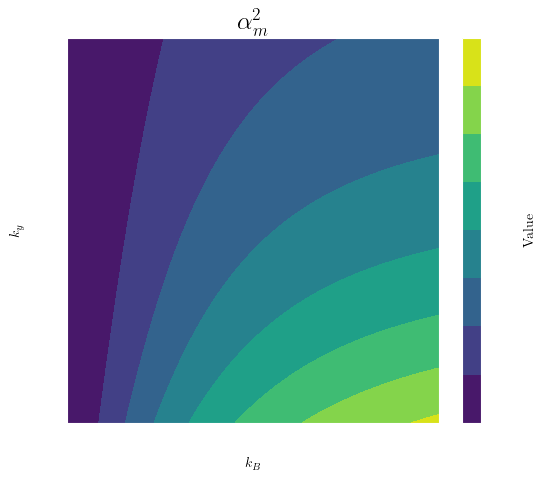

In [39]:
N = 1000
kB = np.linspace(0.1, 3, N)
kY = np.linspace(1, 2, N)
KB, KY = np.meshgrid(kB, kY)

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

# Compute the values for omega_1 and omega_2
alphas = alpha_m(KY, KB)
zeros_alphas = [found_zeros(lambda x: alpha_m(x, kb), 1, 2, N=1000) for kb in kB]

# Get the minimum and maximum values for the color limits

# where not nans


# Plot the first contour
contour = ax.contourf(KB, KY, alphas)
ax.plot(kB, zeros_alphas, 'k--')
ax.set_title(r'$\alpha_m^2$')
ax.set_xlabel('$k_B$')
ax.set_ylabel('$k_y$')

# Add a single colorbar
cbar = fig.colorbar(contour, ax=ax, orientation='vertical')
cbar.set_label('Value')
